In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [136]:
data = pd.read_csv("ps1.csv")

In [137]:
data.columns

Index(['momweight', 'babyweight', 'momheight'], dtype='object')

In [138]:
data.sort_values(by = 'momweight')

,momweight,babyweight,momheight
41858,72,2750,61
46640,75,2270,48
32749,75,2501,59
9245,75,2295,62
10664,75,3100,53
13347,75,3147,62
14615,75,3140,60
45010,76,3515,54
1779,78,3941,60
37546,78,2135,60


In [139]:
data = data.drop(["index", "level_0"], axis = 1)

KeyError: "['index' 'level_0'] not found in axis"

In [177]:
quantiles = np.arange(0, 1, .1)
deciles = data['momweight'].quantile(quantiles)
dd2 = data
deciles
dd2["Bucket"] = pd.cut(data["momweight"], deciles, labels = [1,2,3,4,5,6,7,8,9])
x = dd2.groupby("Bucket").mean()
quantiles = [10,25]


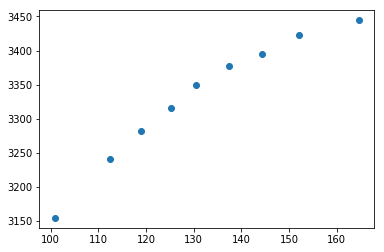

In [180]:
plt.scatter(x["momweight"], x['babyweight'])

In [141]:
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
d6 = []
d7 = []
d8 = []
d9 = []
d10 = []
for i in range(len(data['momweight'])):
    if data["momweight"][i] < 108:
        d1.append(data.iloc[i])
    elif data["momweight"][i] >= 108 and data["momweight"][i] < 115:
        d2.append(data.iloc[i])
    elif data["momweight"][i] >= 115 and data["momweight"][i] < 121:
        d3.append(data.iloc[i])
    elif data["momweight"][i] >= 121 and data["momweight"][i] < 128:
        d4.append(data.iloc[i])
    elif data["momweight"][i] >= 128 and data["momweight"][i] < 133:
        d5.append(data.iloc[i])
    elif data["momweight"][i] >= 133 and data["momweight"][i] < 140:
        d6.append(data.iloc[i])
    elif data["momweight"][i] >= 140 and data["momweight"][i] < 147:
        d7.append(data.iloc[i])
    elif data["momweight"][i] >= 147 and data["momweight"][i] < 158:
        d8.append(data.iloc[i])
    elif data["momweight"][i] >= 158 and data["momweight"][i] < 172:
        d9.append(data.iloc[i])
    elif data["momweight"][i] > 172:
        d10.append(data.iloc[i])
    


In [142]:
d1 = pd.DataFrame(d1)
d2 = pd.DataFrame(d2)
d3 = pd.DataFrame(d3)
d4 = pd.DataFrame(d4)
d5 = pd.DataFrame(d5)
d6 = pd.DataFrame(d6)
d7 = pd.DataFrame(d7)
d8 = pd.DataFrame(d8)
d9 = pd.DataFrame(d9)
d10 = pd.DataFrame(d10)


In [143]:
mean_deciles = []
mean_deciles.append(np.mean(d1))
mean_deciles.append(np.mean(d2))
mean_deciles.append(np.mean(d3))
mean_deciles.append(np.mean(d4))
mean_deciles.append(np.mean(d5))
mean_deciles.append(np.mean(d6))
mean_deciles.append(np.mean(d7))
mean_deciles.append(np.mean(d8))
mean_deciles.append(np.mean(d9))
mean_deciles.append(np.mean(d10))
mean_deciles = pd.DataFrame(mean_deciles)


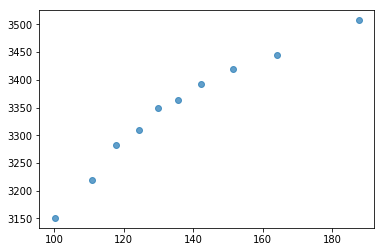

In [144]:
plt.scatter(mean_deciles["momweight"],mean_deciles["babyweight"], alpha = 0.7)


In [145]:
np.percentile(data["momweight"],[10,25,50,75,90])

array([108., 120., 133., 150., 172.])

In [184]:
dataPercentile = []
#Retreives the observations where mother's weight is the corresponding 
for i in data:
    for j in np.percentile(data["momweight"],[10,25,50,75,90]):
        dataPercentile.append(data[data["momweight"] == j])


In [147]:
dp10 =np.mean(dataPercentile[0])
dp25 = np.mean(dataPercentile[1])
dp50 = np.mean(dataPercentile[2])
dp75 = np.mean(dataPercentile[3])
dp90 = np.mean(dataPercentile[4])

In [148]:
dp= []
dp.append(dp10)
dp.append(dp25)
dp.append(dp50)
dp.append(dp75)
dp.append(dp90)

In [182]:
dp = pd.DataFrame(dp)

Text(0.5, 0, "Mother's Weight(Pre-pregnancy) in Pounds")

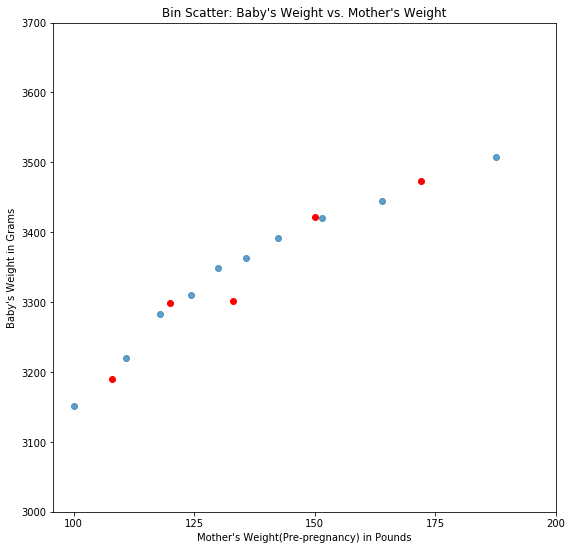

In [150]:
plt.figure(figsize = (9,9))
plt.scatter(mean_deciles["momweight"],mean_deciles["babyweight"], alpha = 0.7)
plt.scatter(dp["momweight"], dp["babyweight"], color = 'red')
plt.xticks([100,125,150,175,200])
plt.yticks(np.arange(3000,3800,100))
plt.title("Bin Scatter: Baby's Weight vs. Mother's Weight")
plt.ylabel("Baby's Weight in Grams")
plt.xlabel("Mother's Weight(Pre-pregnancy) in Pounds")


**2 B)**

In [151]:
buckets = np.arange(94.5,269.5,5)
len(buckets)

35

In [185]:
data["Buckets"] = pd.cut(data["momweight"], buckets, labels =np.arange(1,35,1) )

In [186]:
height_buckets = [0,1,2,3]
interval = [0,60.5, 63.5,66.5,150]
data["Mom_height_bucket"] = pd.cut(data["momheight"], interval, labels = height_buckets)

In [187]:
data["Mom_height_bucket"] = pd.cut(data["momheight"], interval, labels = height_buckets)
#data.groupby(['Buckets', "Mom_height_bucket"]).mean()
max(data[data["Buckets"] == 2.0]["momweight"])

104

Divide mothers into 5‐pound buckets, starting at 95 pounds. Calculate baby
weights separately for 4 groups of mother’s within each bucket:
momheight ≤ 60 inches
momheight between 61 and 63 inches
momheight between 64 and 66 inches
momheight ≥ 67 inches

In [188]:
data["Mom_height_bucket"] = pd.cut(data["momheight"], interval, labels = height_buckets)

In [156]:
data.groupby(['Buckets', "Mom_height_bucket"]).mean()

momweight   babyweight  momheight
Buckets Mom_height_bucket                                    
1       0                   96.663265  3073.599490  59.066327
        1                   96.962963  3097.093682  61.851852
        2                   96.954955  3192.414414  64.477477
        3                   97.000000  3028.250000  69.562500
2       0                  101.392034  3123.138365  59.180294
        1                  101.355556  3175.404678  61.967251
        2                  101.514286  3194.610714  64.539286
        3                  100.800000  3300.400000  67.300000
3       0                  106.391304  3173.907372  59.134216
        1                  106.536702  3204.840801  61.990467
        2                  106.620930  3261.546512  64.613953
        3                  106.732143  3285.053571  67.892857
4       0                  111.259325  3184.056838  59.209591
        1                  111.364959  3211.844402  62.073371
        2                  111.236495  3256.468187  64.689076
        3                  111.220183  3314.330275  67.990826
5       0                  116.371917  3190.256167  59.339658
        1                  116.448315  3259.444318  62.111936
        2                  116.508311  3307.750656  64.771654
        3                  116.522167  3385.635468  67.586207
6       0                  121.039356  3225.574240  59.416816
        1                  121.094924  3266.498477  62.139594
        2                  121.163130  3323.597480  64.744032
        3                  121.291005  3336.100529  67.690476
7       0                  126.358852  3253.311005  59.332536
        1                  126.240408  3296.230815  62.202638
        2                  126.278626  3361.730916  64.844148
        3                  126.344262  3432.965164  67.739754
8       0                  130.845109  3274.366848  59.404891
        1                  130.937050  3311.942446  62.230216
...                               ...          ...        ...
27      2                         NaN          NaN        NaN
        3                  226.062500  3627.843750  70.187500
28      0                         NaN          NaN        NaN
        1                         NaN          NaN        NaN
        2                         NaN          NaN        NaN
        3                  230.923077  3585.230769  70.692308
29      0                         NaN          NaN        NaN
        1                         NaN          NaN        NaN
        2                         NaN          NaN        NaN
        3                  235.000000  3912.285714  71.714286
30      0                         NaN          NaN        NaN
        1                         NaN          NaN        NaN
        2                         NaN          NaN        NaN
        3                  241.250000  3840.500000  72.625000
31      0                         NaN          NaN        NaN
        1                         NaN          NaN        NaN
        2                         NaN          NaN        NaN
        3                  246.000000  3520.000000  72.000000
32      0                         NaN          NaN        NaN
        1                         NaN          NaN        NaN
        2                         NaN          NaN        NaN
        3                  252.000000  3320.000000  73.000000
33      0                         NaN          NaN        NaN
        1                         NaN          NaN        NaN
        2                         NaN          NaN        NaN
        3                         NaN          NaN        NaN
34      0                         NaN          NaN        NaN
        1                         NaN          NaN        NaN
        2                         NaN          NaN        NaN
        3                  260.000000  3761.000000  74.000000

[136 rows x 3 columns]